In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Read Data/ Import Data

In [4]:
inp0=pd.read_csv("previous_application.csv")
inp1=pd.read_csv("application_data.csv")

In [5]:
pd.set_option("display.max_rows",1000) ### set the disply row limit

In [6]:
inp1.shape

(307511, 122)

In [7]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
inp1.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### Droping the columns which has more than 50% missing values

In [9]:
temp=(inp1.isnull().mean()*100).reset_index()
temp=temp.rename(columns={0:"Missing value %"})
temp

,index,Missing value %
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
5,FLAG_OWN_REALTY,0.000000
6,CNT_CHILDREN,0.000000
7,AMT_INCOME_TOTAL,0.000000
8,AMT_CREDIT,0.000000
9,AMT_ANNUITY,0.003902


In [10]:
drop_col=list(temp[temp["Missing value %"]>50]["index"])

In [11]:
inp11=inp1.drop(drop_col, axis=1, inplace=True)

In [12]:
inp1.shape

(307511, 81)

#### Checking the cloumns are continuous or categorical

In [13]:
inp1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'YEARS_BEGINEXPLUATATION_AVG', 'FLOOR

In [14]:
inp1.FLAG_OWN_REALTY.nunique()

2

In [15]:
cont_columns=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","EXT_SOURCE_2","EXT_SOURCE_3","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_MODE","YEARS_BEGINEXPLUATATION_MEDI","FLOORSMAX_MEDI","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_AVG","TOTALAREA_MODE","DAYS_LAST_PHONE_CHANGE"]
categ_columns=["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","NAME_TYPE_SUITE", "NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","OCCUPATION_TYPE","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","ORGANIZATION_TYPE","EMERGENCYSTATE_MODE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

In [16]:
len(cont_columns)+len(categ_columns)

80

In [17]:
temp=(inp1.isnull().mean()*100).reset_index()
temp=temp.rename(columns={0:"Missing value %"})
temp

,index,Missing value %
0,SK_ID_CURR,0.000000
1,TARGET,0.000000
2,NAME_CONTRACT_TYPE,0.000000
3,CODE_GENDER,0.000000
4,FLAG_OWN_CAR,0.000000
5,FLAG_OWN_REALTY,0.000000
6,CNT_CHILDREN,0.000000
7,AMT_INCOME_TOTAL,0.000000
8,AMT_CREDIT,0.000000
9,AMT_ANNUITY,0.003902


In [18]:
impute_col=list(temp[temp["Missing value %"]>0]["index"])

In [19]:
for i in categ_columns:
    mode_=inp1[i].mode()[0]
    inp1[i]=inp1[i].fillna(mode_)

In [20]:
for i in cont_columns:
    median_=inp1[i].median()
    inp1[i]=inp1[i].fillna(median_)

In [21]:
inp1.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE              0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT                      0
AMT_ANNUITY                     0
AMT_GOODS_PRICE                 0
NAME_TYPE_SUITE                 0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

Now null values are cleared.

Also checked the data type... no need of any changes

In [22]:
inp1.TARGET.value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [23]:
inp1.DAYS_BIRTH.nunique()

17460

##### Days are showing in negative values and need necessary changes ---take the absolute values

In [24]:
day_change=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']

In [25]:
inp1.DAYS_BIRTH=abs(inp1.DAYS_BIRTH/365)
inp1.DAYS_EMPLOYED=abs(inp1.DAYS_EMPLOYED/365)
inp1.DAYS_REGISTRATION=abs(inp1.DAYS_REGISTRATION/365)
inp1.DAYS_ID_PUBLISH=abs(inp1.DAYS_ID_PUBLISH/365)


In [26]:
inp1.DAYS_BIRTH.value_counts()

37.668493    43
36.934247    42
49.994521    41
27.452055    41
43.208219    40
             ..
68.213699     1
68.131507     1
21.964384     1
68.761644     1
68.660274     1
Name: DAYS_BIRTH, Length: 17460, dtype: int64

##### Correlation for continuous values

In [27]:
correlation1=inp1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","EXT_SOURCE_2","EXT_SOURCE_3","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_MODE","YEARS_BEGINEXPLUATATION_MEDI","FLOORSMAX_MEDI","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_AVG","TOTALAREA_MODE","DAYS_LAST_PHONE_CHANGE"]].corr()

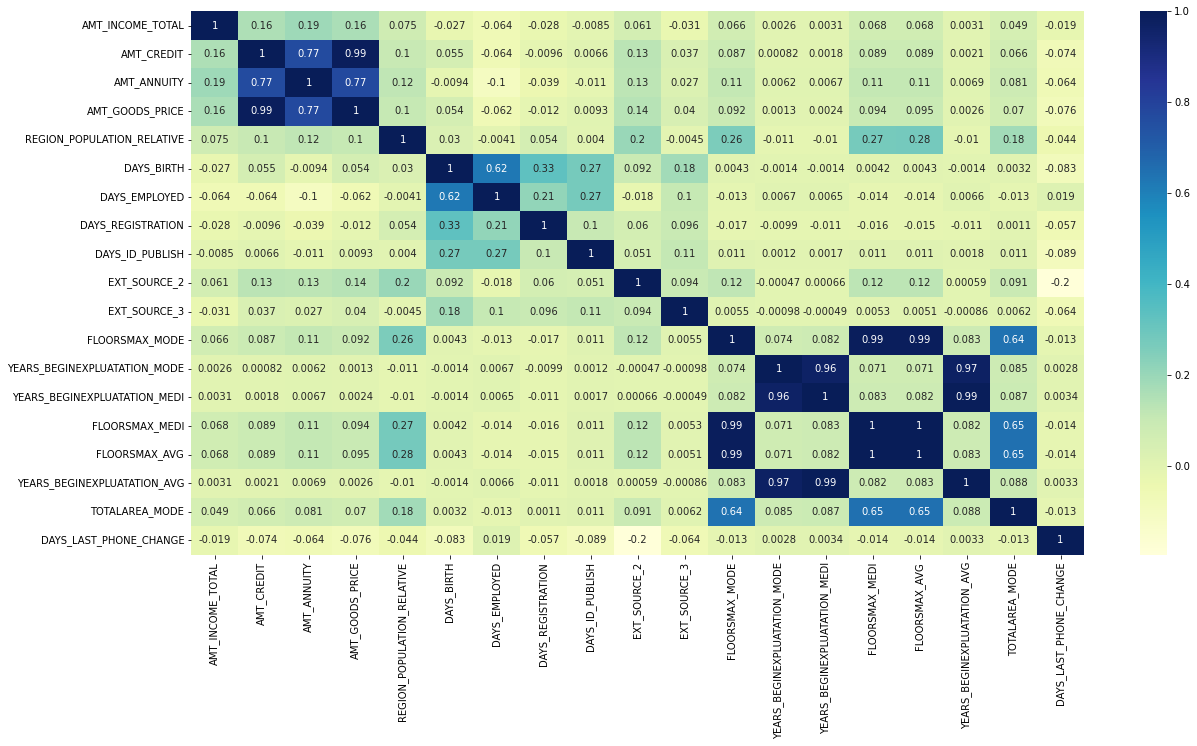

In [28]:
plt.figure(figsize=(20,10))
sns.heatmap(correlation1,annot=True, cmap="YlGnBu")
plt.show()

### Top 10 Correlation: 

#### "AMT_CREDIT", "AMT_GOODS_PRICE",  "FLOORSMAX_MODE",  "YEARS_BEGINEXPLUATATION_MODE", "YEARS_BEGINEXPLUATATION_MEDI",  "FLOORSMAX_MEDI","FLOORSMAX_AVG",  "YEARS_BEGINEXPLUATATION_AVG",  "AMT_ANNUITY","TOTALAREA_MODE" 

#### Observations:

    1. "TARGET","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE", "FLOORSMAX_MODE", "YEARS_BEGINEXPLUATATION_MEDI","FLOORSMAX_MEDI","YEARS_BEGINEXPLUATATION_MODE","FLOORSMAX_AVG","FLOORSMAX_AVG","TOTALAREA_MODE" has very much correlated.
    
    2. "DAYS_BIRTH","DAYS_EMPLOYED" are partially correlated.


In [29]:
# Some catagorical correlation sample:
    
corr1=inp1[["TARGET","AMT_CREDIT","AMT_ANNUITY"]].corr()
corr2=inp1[["TARGET","AMT_GOODS_PRICE","FLOORSMAX_MODE"]].corr()

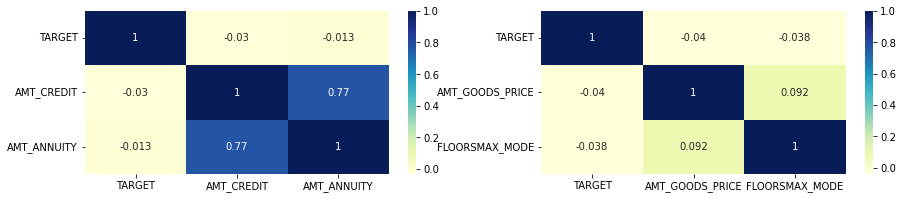

In [30]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
sns.heatmap(corr1, annot=True,cmap="YlGnBu")

plt.subplot(1,2,2)
sns.heatmap(corr2, annot=True,cmap="YlGnBu")
plt.show()

### Data Imbalance

In [31]:
inp1.TARGET.value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

#### Observation :

    1. More than 90% of the payments are defaulters ie. late payment more than X days on at least one of the first Y installments of the loan in our sample.
    
    2. Huge difference between defaulters and non defaulters in plot as well.

In [32]:
data_imbalance=(inp1.TARGET==0).sum()/(inp1.TARGET==1).sum()
data_imbalance

11.387150050352467

#### Data Imbalance = 11%

#### Outlier Treatment:

    1. We check the outliers by using BOX plot or Scatter plot.
    
    2. Treatment can be don in two ways.
        a. Using IQR (Interquartile Range) Method
        b. Using capping

<AxesSubplot:xlabel='REGION_POPULATION_RELATIVE'>

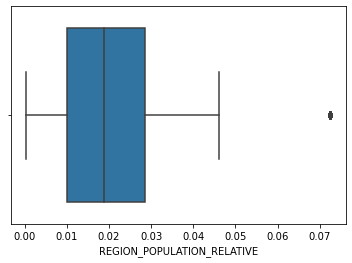

In [33]:
sns.boxplot(inp1.REGION_POPULATION_RELATIVE)

In [34]:
inp1.REGION_POPULATION_RELATIVE.describe()

count    307511.000000
mean          0.020868
std           0.013831
min           0.000290
25%           0.010006
50%           0.018850
75%           0.028663
max           0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64

In [35]:
q1=0.010
q2=0.018
q3=0.26
iqr=q3=q1
upperwhisk=q3+1.5*iqr
lowerwhisk=q1-1.5*iqr

In [36]:
inp1=inp1[inp1.REGION_POPULATION_RELATIVE < upperwhisk]

<AxesSubplot:xlabel='REGION_POPULATION_RELATIVE'>

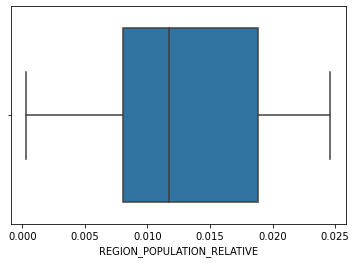

In [37]:
sns.boxplot(inp1.REGION_POPULATION_RELATIVE)

### Capping the outliers

In [38]:
cap_data = inp1['AMT_CREDIT'].quantile(0.90)
inp1 = inp1[inp1['AMT_CREDIT'] < cap_data]

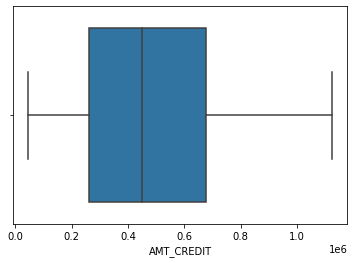

In [39]:
sns.boxplot(inp1['AMT_CREDIT'])
plt.show()

<AxesSubplot:xlabel='AMT_ANNUITY'>

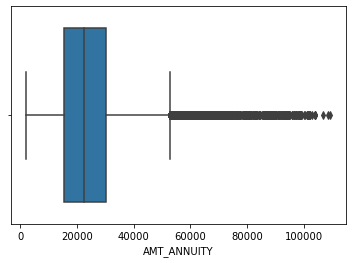

In [40]:
sns.boxplot(inp1.AMT_ANNUITY)

AMT_ANNUITY has upper outliers

In [41]:
cap_data = inp1['AMT_ANNUITY'].quantile(0.95)
inp1 = inp1[inp1['AMT_ANNUITY'] < cap_data]

<AxesSubplot:xlabel='AMT_ANNUITY'>

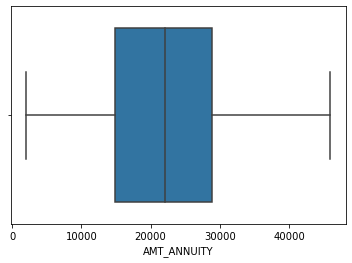

In [42]:
sns.boxplot(inp1.AMT_ANNUITY)

<AxesSubplot:xlabel='DAYS_REGISTRATION'>

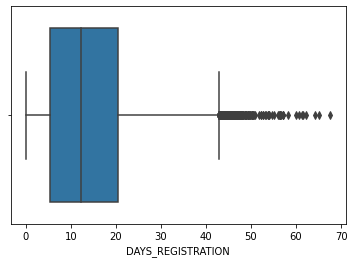

In [43]:
sns.boxplot(inp1['DAYS_REGISTRATION'])

In [44]:
cap_data = inp1['DAYS_REGISTRATION'].quantile(0.85)
inp1 = inp1[inp1['DAYS_REGISTRATION'] < cap_data]

<AxesSubplot:xlabel='DAYS_REGISTRATION'>

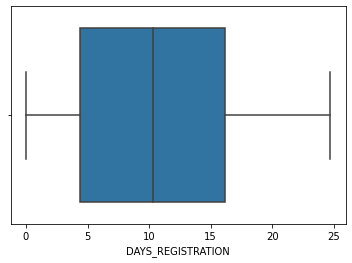

In [45]:
sns.boxplot(inp1['DAYS_REGISTRATION'])

<AxesSubplot:xlabel='EXT_SOURCE_3'>

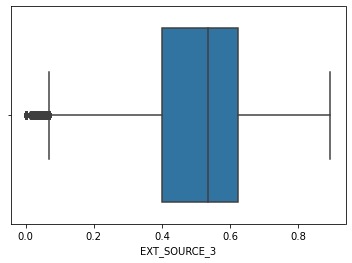

In [46]:
sns.boxplot(inp1['EXT_SOURCE_3'])

In [47]:
cap_data = inp1['EXT_SOURCE_3'].quantile(0.1) ## lower bound capping
inp1 = inp1[inp1['EXT_SOURCE_3'] < cap_data]

<AxesSubplot:xlabel='EXT_SOURCE_3'>

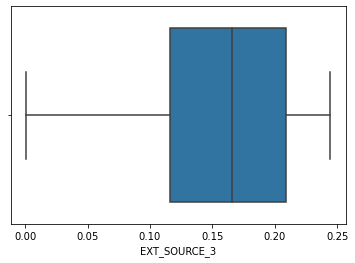

In [48]:
sns.boxplot(inp1['EXT_SOURCE_3'])

In [49]:
inp1_1=inp1[inp1.TARGET==1]
inp1_0=inp1[inp1.TARGET==0]

In [50]:
inp1_1.shape

(3210, 81)

In [51]:
inp1_0.shape

(11596, 81)

In [52]:
inp1_1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
26,100031,1,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,2.0
110,100130,1,Cash loans,F,N,Y,1,157500.0,723996.0,30802.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
211,100246,1,Cash loans,F,N,Y,0,135000.0,495216.0,26995.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
261,100301,1,Cash loans,M,N,Y,1,112500.0,571486.5,31131.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,2.0


<BarContainer object of 18150 artists>

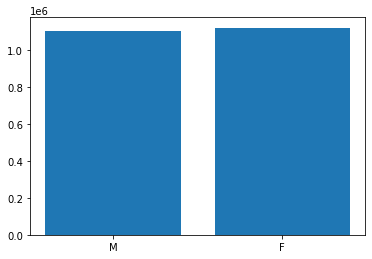

In [99]:
plt.bar(inp1_1.CODE_GENDER,inp1_1.AMT_CREDIT_x)

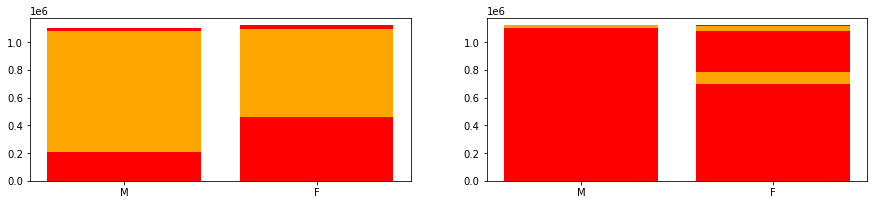

In [54]:
plt.figure(figsize=(15,3))

plt.title("Gender Code Vs Loan amount\n", fontdict={"fontsize":20, 'fontweight':5, 'color':'Blue'})
plt.xlabel("Code_GENDER",fontdict={"fontsize":10, 'fontweight':5, 'color':'blue'})
plt.ylabel("AMT_CREDIT",fontdict={"fontsize":10, 'fontweight':5, 'color':'blue'})


plt.subplot(1,2,1)
plt.bar(inp1_1.CODE_GENDER,inp1_1.AMT_CREDIT,align='center',color=['Orange', 'red'])

plt.subplot(1,2,2)
plt.bar(inp1_0.CODE_GENDER,inp1_0.AMT_CREDIT,align='center',color=['Orange', 'red'],)
plt.show()

Observation:

    1. Male has more loan granded and they have more difficultied for payments.
    
    2. In the other cases of payment also Males are high.
    
    3. Females are alse facing issues for loan payment but that is less that Male. 
    
    4. In other cases of payment females are higher that males

## Previous_application data set

In [55]:
inp0.shape

(1670214, 37)

In [56]:
inp0.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [58]:
inp0.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

### Drop the column who's null value is greater than 99%

In [59]:
inp00=inp0.drop("RATE_INTEREST_PRIMARY", axis=1,inplace=True)
inp00=inp0.drop("RATE_INTEREST_PRIVILEGED", axis=1,inplace=True)

In [60]:
inp0.shape

(1670214, 35)

### Impute null values

#### Mode with categorical value and median with continuous value

In [61]:
cat_col=["NAME_CONTRACT_TYPE","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","CODE_REJECT_REASON","NAME_TYPE_SUITE","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP","PRODUCT_COMBINATION","NFLAG_INSURED_ON_APPROVAL"]
cont_col=["AMT_ANNUITY ","AMT_APPLICATION","AMT_CREDIT","AMT_DOWN_PAYMENT","AMT_GOODS_PRICE","RATE_DOWN_PAYMENT","DAYS_DECISION","SELLERPLACE_AREA","CNT_PAYMENT","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION"]

In [62]:
len(cat_col)+len(cont_col)

32

In [63]:
inp0.NAME_CASH_LOAN_PURPOSE.value_counts()

XAP                                 922661
XNA                                 677918
Repairs                              23765
Other                                15608
Urgent needs                          8412
Buying a used car                     2888
Building a house or an annex          2693
Everyday expenses                     2416
Medicine                              2174
Payments on other loans               1931
Education                             1573
Journey                               1239
Purchase of electronic equipment      1061
Buying a new car                      1012
Wedding / gift / holiday               962
Buying a home                          865
Car repairs                            797
Furniture                              749
Buying a holiday home / land           533
Business development                   426
Gasification / water supply            300
Buying a garage                        136
Hobby                                   55
Money for a

In [64]:
inp00=inp0.drop("NAME_CASH_LOAN_PURPOSE", axis=1, inplace=True)

In [65]:
inp0.shape

(1670214, 34)

#### Put it in a loop to impute all "XNA" and "XAP"

In [66]:
for i in cat_col:
    mode_value=inp0[i].mode()[0]
    inp0[i]=inp0[i].replace("XNA",mode_value)

In [67]:
for i in cat_col:
    mode_value=inp0[i].mode()[0]
    inp0[i]=inp0[i].replace("XAP",mode_value)

In [68]:
inp0.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


#### Change the categorical datatype to Object 

In [69]:
for i in cat_col:
    inp0[i]=inp0[i].astype("object")

In [70]:
inp0.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,774370.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,0.079637,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,0.107823,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,-0.000015,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,0.000000,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,0.051605,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,0.108909,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000


### Merging Application data and Privious application data with ID

In [71]:
inp1_1=inp1_1.merge(inp0, on="SK_ID_CURR")  ## merge the application and previous application data sets target value is 1

In [72]:
inp1_0=inp1_0.merge(inp0, on="SK_ID_CURR") ## merge the application and previous application data set target value is 0

In [73]:
inp1_1.shape

(18150, 114)

In [74]:
inp1_0.shape

(63145, 114)

In [75]:
inp1_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18150 entries, 0 to 18149
Columns: 114 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(42), int64(41), object(31)
memory usage: 15.9+ MB


In [76]:
inp1_0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63145 entries, 0 to 63144
Columns: 114 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(42), int64(41), object(31)
memory usage: 55.4+ MB


In [77]:
inp1_1.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE_x', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=114)

In [78]:
cat_col=["NAME_CONTRACT_TYPE","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","CODE_REJECT_REASON","NAME_TYPE_SUITE","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP","PRODUCT_COMBINATION","NFLAG_INSURED_ON_APPROVAL"]
cont_col=["AMT_ANNUITY ","AMT_APPLICATION","AMT_CREDIT","AMT_DOWN_PAYMENT","AMT_GOODS_PRICE","RATE_DOWN_PAYMENT","DAYS_DECISION","SELLERPLACE_AREA","CNT_PAYMENT","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION"]
print(len(cat_col))
print(len(cont_col))

18
14


In [79]:
inp1_1.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE_x             0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT_x                     0.000000
AMT_ANNUITY_x                    0.000000
AMT_GOODS_PRICE_x                0.000000
NAME_TYPE_SUITE_x                0.000000
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [80]:
temp=(inp1_1.isnull().mean()*100).reset_index()
temp=temp.rename(columns={0:"missing value %"})
drop_col=list(temp[temp["missing value %"]>50]["index"])

In [81]:
inp1_temp=inp1_1.drop(drop_col, axis=1, inplace=True)

In [82]:
inp1_1.shape

(18150, 105)

In [83]:
temp=(inp1_1.isnull().mean()*100).reset_index()
temp=temp.rename(columns={0:"missing value %"})
temp[temp["missing value %"]>0]

,index,missing value %
83,AMT_ANNUITY_y,27.724518
86,AMT_GOODS_PRICE_y,27.333333
102,CNT_PAYMENT,27.724518
104,PRODUCT_COMBINATION,0.121212


In [84]:
inp1_1.PRODUCT_COMBINATION.nunique()

17

In [85]:
cont_=["AMT_ANNUITY_y","AMT_GOODS_PRICE_y"]
cat_=["CNT_PAYMENT","PRODUCT_COMBINATION"]

In [86]:
for i in cont_:
    median_=inp1_1[i].median()
    inp1_1[i]=inp1_1[i].fillna(median_)

In [87]:
for i in cat_:
    mode_=inp1_1[i].mode()[0]
    inp1_1[i]=inp1_1[i].fillna(mode_)

In [88]:
inp1_0.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE_x             0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT_x                     0.000000
AMT_ANNUITY_x                    0.000000
AMT_GOODS_PRICE_x                0.000000
NAME_TYPE_SUITE_x                0.000000
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0.000000
FLAG_WORK_PHONE                  0

In [89]:
temp1=(inp1_0.isnull().mean()*100).reset_index()
temp1=temp1.rename(columns={0:"Missing value %"})
drop_col=list(temp1[temp1["Missing value %"]>45]["index"])

In [90]:
inp1_0temp=inp1_0.drop(drop_col, axis=1, inplace=True)

In [91]:
inp1_0.shape

(63145, 105)

In [92]:
temp1=(inp1_0.isnull().mean()*100).reset_index()
temp1=temp1.rename(columns={0:"missing value %"})
temp1[temp1["missing value %"]>0]

,index,missing value %
83,AMT_ANNUITY_y,25.254573
86,AMT_GOODS_PRICE_y,24.852324
102,CNT_PAYMENT,25.254573
104,PRODUCT_COMBINATION,0.045926


In [93]:
for i in cont_:
    median_=inp1_0[i].median()
    inp1_0[i]=inp1_0[i].fillna(median_)

In [94]:
for i in cat_:
    mode_=inp1_0[i].mode()[0]
    inp1_0[i]=inp1_0[i].fillna(mode_)

In [95]:
inp1_0.isnull().sum()

SK_ID_CURR                      0
TARGET                          0
NAME_CONTRACT_TYPE_x            0
CODE_GENDER                     0
FLAG_OWN_CAR                    0
FLAG_OWN_REALTY                 0
CNT_CHILDREN                    0
AMT_INCOME_TOTAL                0
AMT_CREDIT_x                    0
AMT_ANNUITY_x                   0
AMT_GOODS_PRICE_x               0
NAME_TYPE_SUITE_x               0
NAME_INCOME_TYPE                0
NAME_EDUCATION_TYPE             0
NAME_FAMILY_STATUS              0
NAME_HOUSING_TYPE               0
REGION_POPULATION_RELATIVE      0
DAYS_BIRTH                      0
DAYS_EMPLOYED                   0
DAYS_REGISTRATION               0
DAYS_ID_PUBLISH                 0
FLAG_MOBIL                      0
FLAG_EMP_PHONE                  0
FLAG_WORK_PHONE                 0
FLAG_CONT_MOBILE                0
FLAG_PHONE                      0
FLAG_EMAIL                      0
OCCUPATION_TYPE                 0
CNT_FAM_MEMBERS                 0
REGION_RATING_

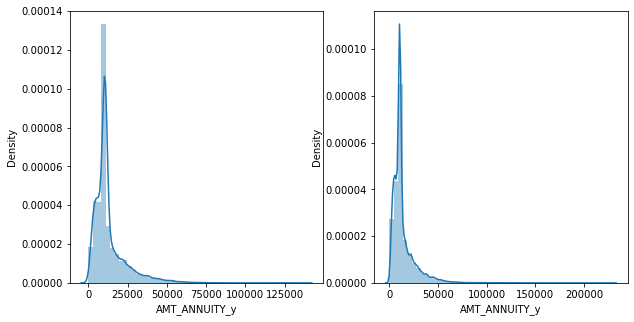

In [96]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.distplot(inp1_1.AMT_ANNUITY_y)

plt.subplot(1,2,2)
sns.distplot(inp1_0.AMT_ANNUITY_y)

plt.show()

Incase of numerical values, if the mean and median are same it is advised to fill by mean. 

If mean and median are not same then substitute missing value by median outlier mean is not equal to median

In [100]:
catagorical_merge_col=list(set(inp1_1.columns)-set(inp1_1.describe().columns))
print(catagorical_merge_col)
print(len(catagorical_merge_col))

['NAME_CONTRACT_STATUS', 'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE', 'CHANNEL_TYPE', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_EDUCATION_TYPE', 'CODE_REJECT_REASON', 'FLAG_OWN_CAR', 'NAME_SELLER_INDUSTRY', 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE_y', 'NAME_CONTRACT_TYPE_x', 'NAME_GOODS_CATEGORY', 'WEEKDAY_APPR_PROCESS_START_x', 'NAME_PRODUCT_TYPE', 'NAME_TYPE_SUITE_x', 'NAME_PAYMENT_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'EMERGENCYSTATE_MODE', 'CODE_GENDER', 'NAME_PORTFOLIO', 'NAME_CLIENT_TYPE', 'ORGANIZATION_TYPE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START_y']
29


In [104]:
catagorical_merge_col0=list(set(inp1_0.columns)-set(inp1_0.describe().columns))
print(catagorical_merge_col0)
print(len(catagorical_merge_col0))

['NAME_CONTRACT_STATUS', 'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE', 'CHANNEL_TYPE', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_EDUCATION_TYPE', 'CODE_REJECT_REASON', 'FLAG_OWN_CAR', 'NAME_SELLER_INDUSTRY', 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE_y', 'NAME_CONTRACT_TYPE_x', 'NAME_GOODS_CATEGORY', 'WEEKDAY_APPR_PROCESS_START_x', 'NAME_PRODUCT_TYPE', 'NAME_TYPE_SUITE_x', 'NAME_PAYMENT_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'EMERGENCYSTATE_MODE', 'CODE_GENDER', 'NAME_PORTFOLIO', 'NAME_CLIENT_TYPE', 'ORGANIZATION_TYPE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START_y']
29


In [101]:
numerical_merge_col=inp1_1.describe().columns
print(numerical_merge_col)
print(len(numerical_merge_col))

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
       'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE',
       'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE'

In [ ]:
# cat_col=["NAME_CONTRACT_TYPE","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","CODE_REJECT_REASON","NAME_TYPE_SUITE","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP","PRODUCT_COMBINATION","NFLAG_INSURED_ON_APPROVAL"]
# cont_col=["AMT_ANNUITY ","AMT_APPLICATION","AMT_CREDIT","AMT_DOWN_PAYMENT","AMT_GOODS_PRICE","RATE_DOWN_PAYMENT","DAYS_DECISION","SELLERPLACE_AREA","CNT_PAYMENT","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION"]

# cont_columns=["AMT_INCOME_TOTAL","AMT_CREDIT_x","AMT_ANNUITY_x","AMT_GOODS_PRICE_x","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","EXT_SOURCE_2","EXT_SOURCE_3","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_MODE","YEARS_BEGINEXPLUATATION_MEDI","FLOORSMAX_MEDI","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_AVG","TOTALAREA_MODE","DAYS_LAST_PHONE_CHANGE"]
# categ_columns=["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","NAME_TYPE_SUITE", "NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","OCCUPATION_TYPE","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","ORGANIZATION_TYPE","EMERGENCYSTATE_MODE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

<Figure size 1080x576 with 0 Axes>

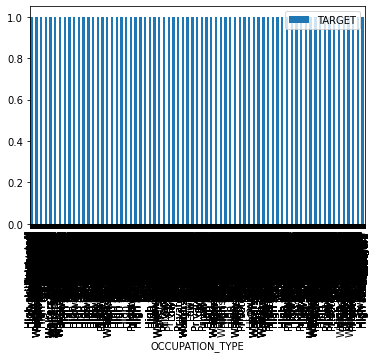

In [152]:
fig=plt.figure(figsize=(15,8))

inp1_1.plot.bar(x="OCCUPATION_TYPE",y="TARGET")
plt.show()

In [102]:
inp1_0.NAME_CONTRACT_STATUS.value_counts()

Approved        33484
Refused         16260
Canceled        12041
Unused offer     1360
Name: NAME_CONTRACT_STATUS, dtype: int64

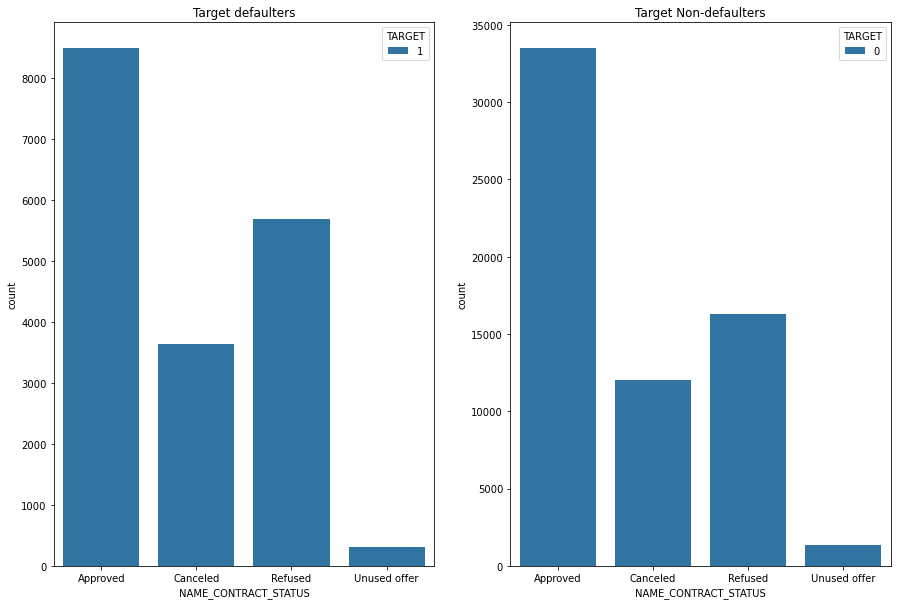

In [114]:
fig=plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.title("Target defaulters")
sns.countplot(x="NAME_CONTRACT_STATUS", hue="TARGET" ,data=inp1_1)

plt.subplot(1,2,2)
plt.title("Target Non-defaulters")
sns.countplot(x="NAME_CONTRACT_STATUS", hue="TARGET" ,data=inp1_0,)

plt.show()

Observation:
    1. Great defference between the defaulters and non defaulters in there contract status.
    2. But in both cases Approved cases are more than the rest of the status.
    3. Used offers are very less in defaulters.
    
    

In [ ]:
# cat_col=["NAME_CONTRACT_TYPE","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","FLAG_LAST_APPL_PER_CONTRACT","NFLAG_LAST_APPL_IN_DAY","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","CODE_REJECT_REASON","NAME_TYPE_SUITE","NAME_CLIENT_TYPE","NAME_GOODS_CATEGORY","NAME_PORTFOLIO","NAME_PRODUCT_TYPE","CHANNEL_TYPE","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP","PRODUCT_COMBINATION","NFLAG_INSURED_ON_APPROVAL"]
# cont_col=["AMT_ANNUITY ","AMT_APPLICATION","AMT_CREDIT","AMT_DOWN_PAYMENT","AMT_GOODS_PRICE","RATE_DOWN_PAYMENT","DAYS_DECISION","SELLERPLACE_AREA","CNT_PAYMENT","DAYS_FIRST_DRAWING","DAYS_FIRST_DUE","DAYS_LAST_DUE_1ST_VERSION","DAYS_LAST_DUE","DAYS_TERMINATION"]

# cont_columns=["AMT_INCOME_TOTAL","AMT_CREDIT_x","AMT_ANNUITY_x","AMT_GOODS_PRICE_x","REGION_POPULATION_RELATIVE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","EXT_SOURCE_2","EXT_SOURCE_3","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_MODE","YEARS_BEGINEXPLUATATION_MEDI","FLOORSMAX_MEDI","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_AVG","TOTALAREA_MODE","DAYS_LAST_PHONE_CHANGE"]
# categ_columns=["TARGET","NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","CNT_CHILDREN","NAME_TYPE_SUITE", "NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE","FLAG_MOBIL","FLAG_EMP_PHONE","FLAG_WORK_PHONE","FLAG_CONT_MOBILE","FLAG_PHONE","FLAG_EMAIL","OCCUPATION_TYPE","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY","WEEKDAY_APPR_PROCESS_START","HOUR_APPR_PROCESS_START","REG_REGION_NOT_LIVE_REGION","REG_REGION_NOT_WORK_REGION","LIVE_REGION_NOT_WORK_REGION","REG_CITY_NOT_LIVE_CITY","REG_CITY_NOT_WORK_CITY","LIVE_CITY_NOT_WORK_CITY","ORGANIZATION_TYPE","EMERGENCYSTATE_MODE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","FLAG_DOCUMENT_2","FLAG_DOCUMENT_3","FLAG_DOCUMENT_4","FLAG_DOCUMENT_5","FLAG_DOCUMENT_6","FLAG_DOCUMENT_7","FLAG_DOCUMENT_8","FLAG_DOCUMENT_9","FLAG_DOCUMENT_10","FLAG_DOCUMENT_11","FLAG_DOCUMENT_12","FLAG_DOCUMENT_13","FLAG_DOCUMENT_14","FLAG_DOCUMENT_15","FLAG_DOCUMENT_16","FLAG_DOCUMENT_17","FLAG_DOCUMENT_18","FLAG_DOCUMENT_19","FLAG_DOCUMENT_20","FLAG_DOCUMENT_21","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

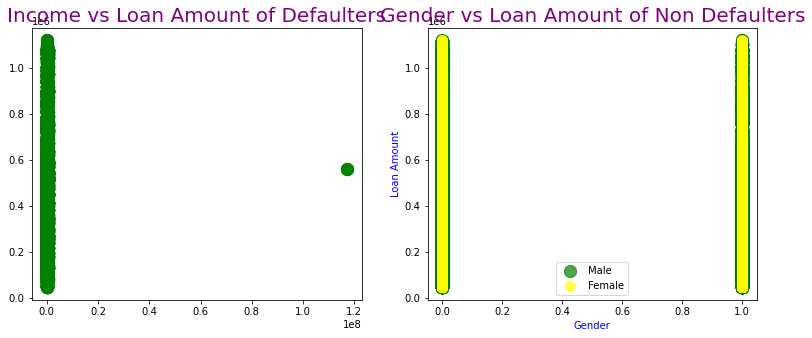

In [150]:
fig=plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.scatter(inp1_1["AMT_INCOME_TOTAL"] , inp1_1.AMT_CREDIT_x, c= 'Green', alpha= 0.7, s = 150 )

plt.title("Income vs Loan Amount of Defaulters", fontdict={"fontsize":20, 'fontweight':5, 'color':'Purple'})


plt.subplot(1,2,2)
plt.scatter(inp1_0["CODE_GENDER"] == "M", inp1_0.AMT_CREDIT_x, c= 'Green', alpha= 0.7, s = 150, label="Male" )

plt.scatter(inp1_0["CODE_GENDER"] == "F", inp1_0.AMT_CREDIT_x, c= 'Yellow', alpha= 0.7, s = 100, label="Female" )

plt.title("Gender vs Loan Amount of Non Defaulters", fontdict={"fontsize":20, 'fontweight':5, 'color':'Purple'})
plt.xlabel("Gender",fontdict={"fontsize":10, 'fontweight':5, 'color':'blue'})
plt.ylabel("Loan Amount",fontdict={"fontsize":10, 'fontweight':5, 'color':'Blue'})

plt.legend()
plt.show()


Text(0, 0.5, 'Loan Amt_credit')

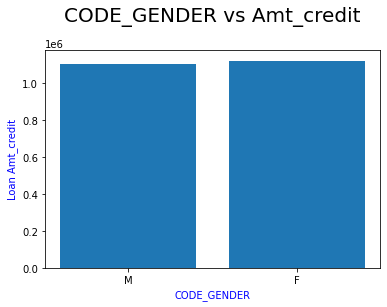

In [155]:
plt.bar(inp1_1.CODE_GENDER,inp1_1.AMT_CREDIT_x)
plt.title("CODE_GENDER vs Amt_credit\n", fontdict={"fontsize":20, 'fontweight':5, 'color':'Black'})
plt.xlabel("CODE_GENDER",fontdict={"fontsize":10, 'fontweight':5, 'color':'blue'})
plt.ylabel("Loan Amt_credit",fontdict={"fontsize":10, 'fontweight':5, 'color':'Blue'})

Text(0, 0.5, 'Loan Amt_credit')

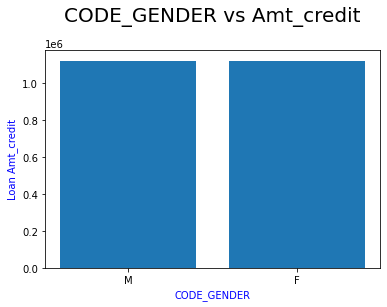

In [156]:
plt.bar(inp1_0.CODE_GENDER,inp1_0.AMT_CREDIT_x)
plt.title("CODE_GENDER vs Amt_credit\n", fontdict={"fontsize":20, 'fontweight':5, 'color':'Black'})
plt.xlabel("CODE_GENDER",fontdict={"fontsize":10, 'fontweight':5, 'color':'blue'})
plt.ylabel("Loan Amt_credit",fontdict={"fontsize":10, 'fontweight':5, 'color':'Blue'})

In [177]:
inp1_1.NAME_PAYMENT_TYPE.unique()

array(['Cash through the bank', 'Non-cash from your account',
       'Cashless from the account of the employer'], dtype=object)

In [ ]:
# ['NAME_CONTRACT_STATUS', 'WEEKDAY_APPR_PROCESS_START_y', 'FLAG_OWN_REALTY', 'NAME_HOUSING_TYPE', 'CHANNEL_TYPE', 'NFLAG_LAST_APPL_IN_DAY', 'NAME_EDUCATION_TYPE', 'CODE_REJECT_REASON', 'FLAG_OWN_CAR', 'NAME_SELLER_INDUSTRY', 'OCCUPATION_TYPE', 'NAME_CONTRACT_TYPE_y', 'NAME_CONTRACT_TYPE_x', 'NAME_GOODS_CATEGORY', 'WEEKDAY_APPR_PROCESS_START_x', 'NAME_PRODUCT_TYPE', 'NAME_TYPE_SUITE_x', 'NAME_PAYMENT_TYPE', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'EMERGENCYSTATE_MODE', 'CODE_GENDER', 'NAME_PORTFOLIO', 'NAME_CLIENT_TYPE', 'ORGANIZATION_TYPE', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'FLAG_LAST_APPL_PER_CONTRACT', 'HOUR_APPR_PROCESS_START_y']

In [ ]:
# CNT_CHILDREN', 'AMT_INCOME_TOTAL',
#        'AMT_CREDIT_x', 'AMT_ANNUITY_x', 'AMT_GOODS_PRICE_x',
#        'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
#        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
#        'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
#        'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
#        'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START_x',
#        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
#        'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
#        'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'EXT_SOURCE_2',
#        'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
#        'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE'

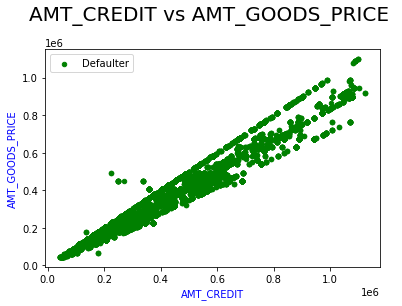

In [171]:

inp1_1.plot (x='AMT_CREDIT_x', y='AMT_GOODS_PRICE_x', kind='scatter',c="Green",  label="Defaulter")

plt.title("AMT_CREDIT vs AMT_GOODS_PRICE \n", fontdict={"fontsize":20, 'fontweight':5, 'color':'Black'})
plt.xlabel("AMT_CREDIT",fontdict={"fontsize":10, 'fontweight':5, 'color':'blue'})
plt.ylabel("AMT_GOODS_PRICE",fontdict={"fontsize":10, 'fontweight':5, 'color':'blue'})



plt.legend()
plt.show ()

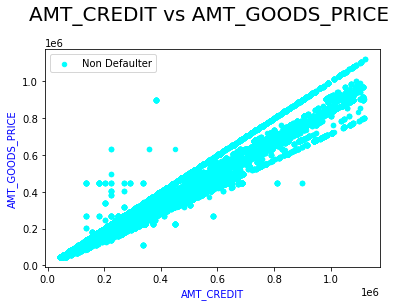

In [172]:

inp1_0.plot (x='AMT_CREDIT_x', y='AMT_GOODS_PRICE_x', kind='scatter',c="Cyan", label="Non Defaulter")

plt.title("AMT_CREDIT vs AMT_GOODS_PRICE \n", fontdict={"fontsize":20, 'fontweight':5, 'color':'Black'})
plt.xlabel("AMT_CREDIT",fontdict={"fontsize":10, 'fontweight':5, 'color':'blue'})
plt.ylabel("AMT_GOODS_PRICE",fontdict={"fontsize":10, 'fontweight':5, 'color':'blue'})

plt.legend()
plt.show ()

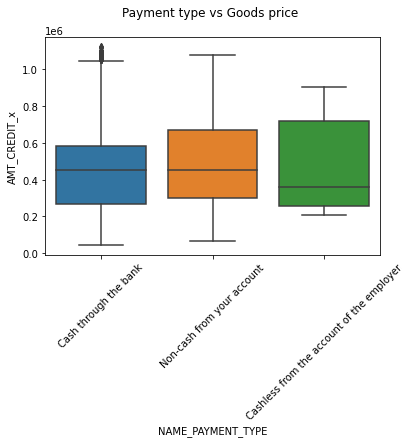

In [180]:
sns.boxplot(x=inp1_1.NAME_PAYMENT_TYPE, y=inp1_1.AMT_CREDIT_x)
plt.title("Payment type vs Goods price \n")
plt.xticks(rotation=45)
plt.show()

In [ ]:
end-----